# Zomato end-end EDA 

## Analyst: Shivali Muthukumar

In [1]:

# Zomato Restaurant Reviews – End-to-End EDA Notebook

# 1. Introduction
# In this notebook, we will perform an end-to-end Exploratory Data Analysis (EDA) on Zomato restaurant reviews and metadata.
# The objective is to clean the data, analyze key trends, visualize insights, and prepare the dataset for further analysis or modeling.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

/Users/shivalimuthukumar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
# Load Reviews Dataset
reviews_path = Path("/Users/shivalimuthukumar/Desktop/Zomato Restaurant reviews.csv")
reviews_df = pd.read_csv(reviews_path)
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [9]:
# Load Metadata Dataset
meta_path = Path("/Users/shivalimuthukumar/Desktop/Zomato Restaurant names and Metadata.csv")
metadata_df = pd.read_csv(meta_path)
metadata_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [10]:
# Data Cleaning & Preprocessing
def clean_columns(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("[^a-z0-9_]+", "", regex=True)
    )
    return df

reviews_df = clean_columns(reviews_df)
metadata_df = clean_columns(metadata_df)

reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')
reviews_df['time'] = pd.to_datetime(reviews_df['time'], errors='coerce')

normalize = lambda x: x.astype(str).str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)
reviews_df['restaurant_key'] = normalize(reviews_df['restaurant'])
metadata_df['restaurant_key'] = normalize(metadata_df['name'])

reviews_df.drop_duplicates(inplace=True)
metadata_df.drop_duplicates(inplace=True)

rating_mean = reviews_df['rating'].mean()
reviews_df['rating'].fillna(rating_mean, inplace=True)

merged_df = pd.merge(reviews_df, metadata_df, on='restaurant_key', how='left', suffixes=('_review', '_meta'))


/var/folders/76/h0hd92ws6r7cjlnr540_frr40000gn/T/ipykernel_68794/3701418973.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_df['rating'].fillna(rating_mean, inplace=True)


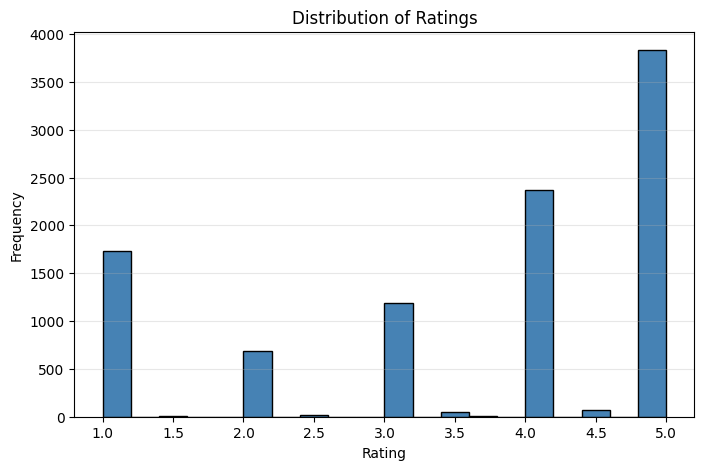

In [11]:
# EDA: Rating Distribution
plt.figure(figsize=(8,5))
plt.hist(reviews_df['rating'], bins=20, edgecolor='black', color='steelblue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()

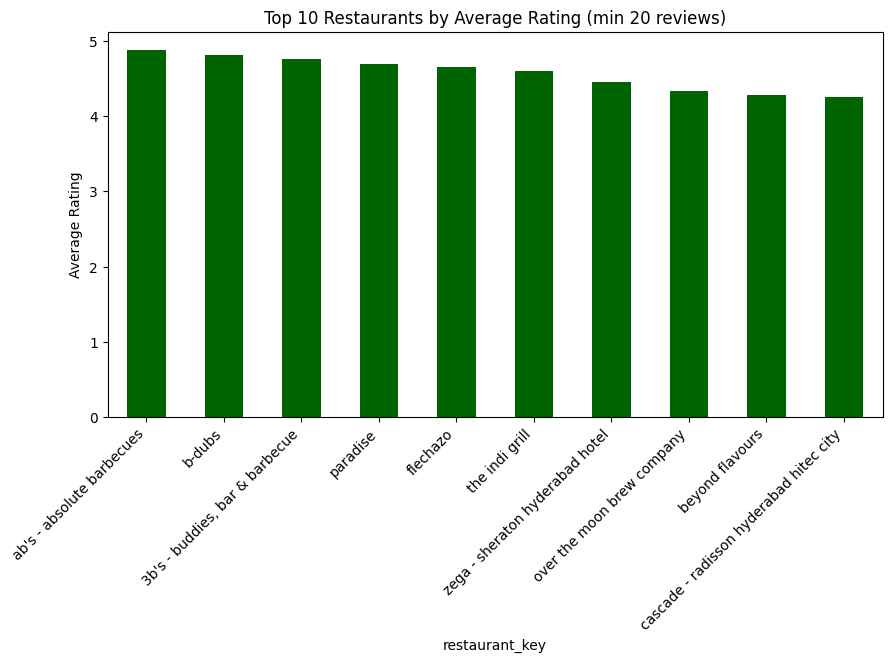

In [12]:
# Top Restaurants by Avg Rating
min_reviews = 20
top_restaurants = reviews_df.groupby('restaurant_key').agg(
    avg_rating=('rating', 'mean'),
    n_reviews=('rating', 'count')
).query("n_reviews >= @min_reviews").sort_values('avg_rating', ascending=False).head(10)

plt.figure(figsize=(10,5))
top_restaurants['avg_rating'].plot(kind='bar', color='darkgreen')
plt.title("Top 10 Restaurants by Average Rating (min 20 reviews)")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.show()

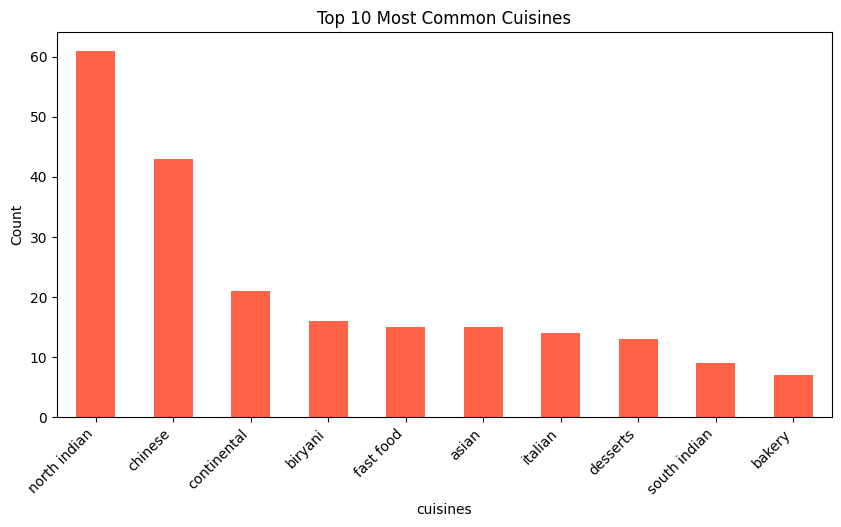

In [13]:
# Most Common Cuisines
cuisine_series = metadata_df['cuisines'].dropna().astype(str).str.split(',')
cuisine_exploded = cuisine_series.explode().str.strip().str.lower()
top_cuisines = cuisine_exploded.value_counts().head(10)

plt.figure(figsize=(10,5))
top_cuisines.plot(kind='bar', color='tomato')
plt.title("Top 10 Most Common Cuisines")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

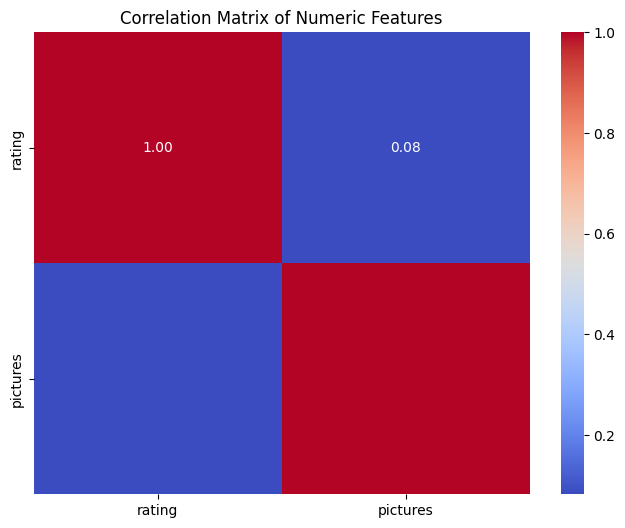

In [14]:
# Correlation Matrix
num_cols = merged_df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

All cleaned files and plots saved in /Users/shivalimuthukumar/Desktop/Zomato_Assignment.


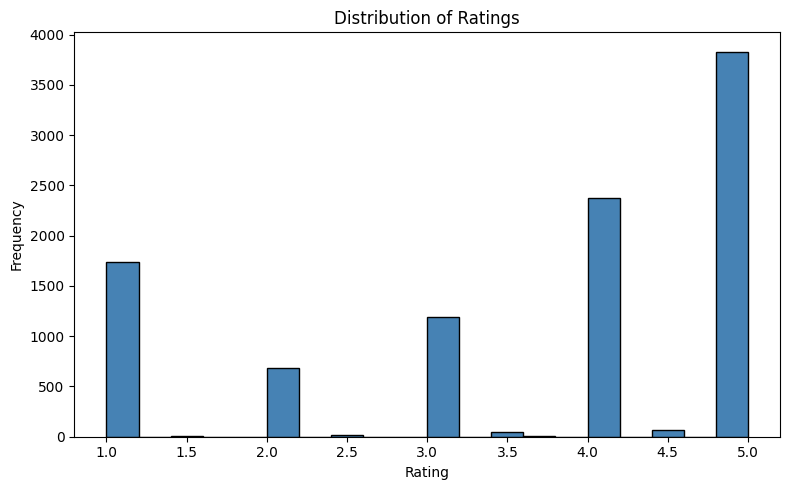

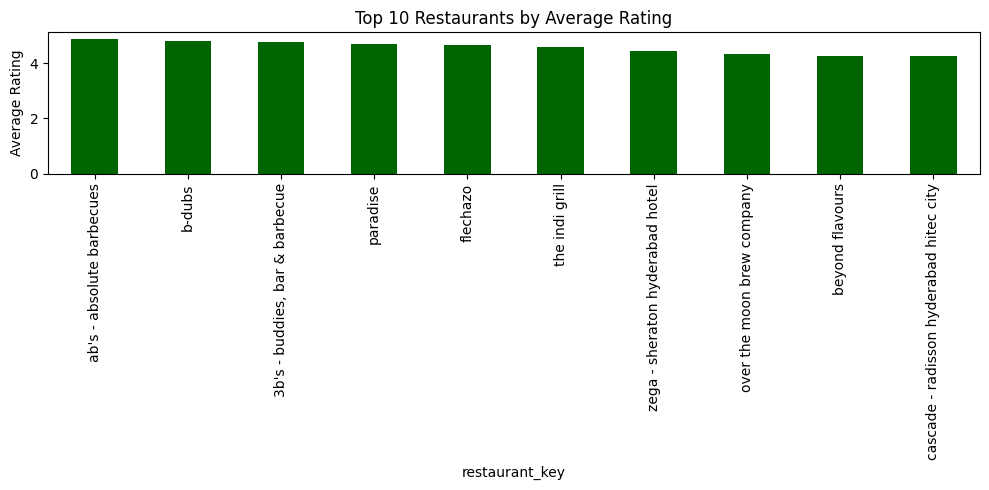

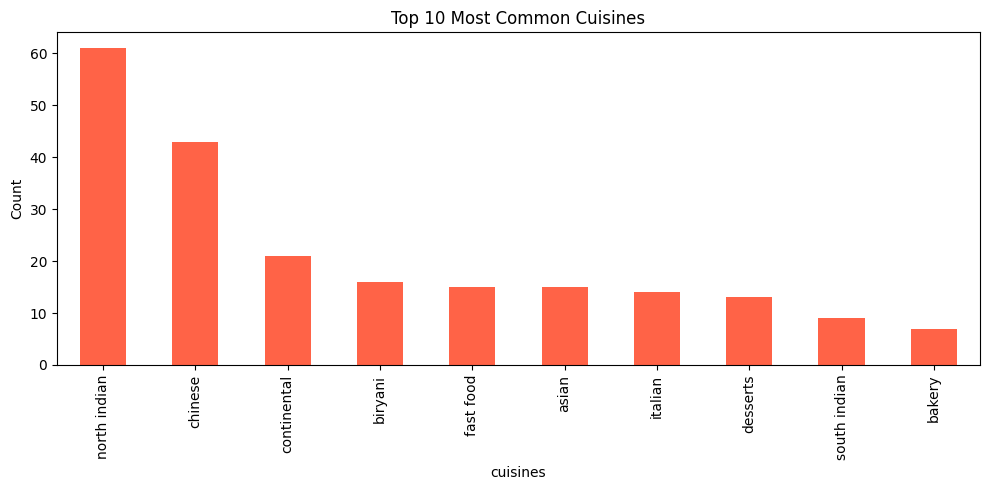

In [16]:
# Save Outputs
output_dir = Path("/Users/shivalimuthukumar/Desktop/Zomato_Assignment")
plots_dir = Path("/Users/shivalimuthukumar/Desktop/Zomato_Assignment/plots")
output_dir.mkdir(exist_ok=True, parents=True)
plots_dir.mkdir(exist_ok=True, parents=True)

reviews_df.to_csv(output_dir / "clean_reviews.csv", index=False)
metadata_df.to_csv(output_dir / "clean_metadata.csv", index=False)
merged_df.to_csv(output_dir / "merged_zomato.csv", index=False)

plt.figure(figsize=(8,5))
plt.hist(reviews_df['rating'], bins=20, edgecolor='black', color='steelblue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(plots_dir / "rating_distribution.png")

plt.figure(figsize=(10,5))
top_restaurants['avg_rating'].plot(kind='bar', color='darkgreen')
plt.title("Top 10 Restaurants by Average Rating")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.savefig(plots_dir / "top_restaurants.png")

plt.figure(figsize=(10,5))
top_cuisines.plot(kind='bar', color='tomato')
plt.title("Top 10 Most Common Cuisines")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(plots_dir / "top_cuisines.png")

print("All cleaned files and plots saved in /Users/shivalimuthukumar/Desktop/Zomato_Assignment.")